# PARTE A. Perceptron - Conjunto de dados Iris

In [1]:
import pandas as pd

Xy = pd.read_csv('./datasets/iris_adapted_mcp.csv')

X = Xy.drop(['sepal-width', 'petal-width', 'class'], axis = 1)
y = Xy['class']

X.head()

,sepal-length,petal-length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


# Separando os dados de treino e teste

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Normalizando os dados de treino

In [3]:
from sklearn.preprocessing import StandardScaler

X_train_scaler = StandardScaler().fit_transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train.columns) # convertendo para DF

# Treinando MLP com dados de treino normalizados

In [4]:
from mcp.mcp import MCP

cls_mcp = MCP()
cls_mcp.fit(X_train_scaler, y_train)
cls_mcp.score(X_test, y_test)

0.7

# Matriz de confusão

In [5]:
from sklearn.metrics import confusion_matrix

y_pred = [
    cls_mcp.predict(x)
    for x in X_test.values
]

conf_matrix = confusion_matrix(y_test, y_pred)
''' 
...
'''
conf_matrix

array([[10,  0,  3],
       [ 0,  0,  6],
       [ 0,  0, 11]])

# Superfície de decisão das amostras e retas produzidas pelo vetor de pesos

IndexError: index 2 is out of bounds for axis 1 with size 2

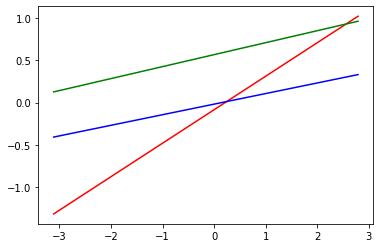

In [18]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

data = X_train_scaler[:][:].values

percetrons_weights = cls_mcp.get_weights()

x_ax = np.arange(data[: ,0].min()-1, data[: ,1].max()+1, 0.1)
w1 = percetrons_weights[0][1]
w2 = percetrons_weights[0][2]
b = percetrons_weights[0][0]
plt.plot(x_ax, -w1*x_ax/w2 + b/w2, color='red')

w1 = percetrons_weights[1][1]
w2 = percetrons_weights[1][2]
b = percetrons_weights[1][0]
plt.plot(x_ax, -w1*x_ax/w2 + b/w2, color='blue')


w1 = percetrons_weights[2][1]
w2 = percetrons_weights[2][2]
b = percetrons_weights[2][0]
plt.plot(x_ax, -w1*x_ax/w2 + b/w2, color='green')

setosa = np.where(y_train == 'Iris-setosa')
versicolor = np.where(y_train == 'Iris-versicolor')
virginica = np.where(y_train == 'Iris-virginica')
plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='x', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='green', marker='^', label='virginica')

plt.show()